In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [194]:
data = pd.read_csv('housing.csv')

In [195]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [196]:
#we want to predict median house value

In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [198]:
data.dropna(inplace=True)

In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [200]:
from sklearn.model_selection import train_test_split
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [201]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [202]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [204]:
train_data = X_train.join(y_train)

In [205]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
6506,-118.06,34.08,42.0,1988.0,402.0,1239.0,402.0,3.2569,<1H OCEAN,201500.0
15204,-117.08,32.91,9.0,1547.0,218.0,683.0,231.0,7.5604,<1H OCEAN,327900.0
9416,-122.48,37.86,52.0,3914.0,752.0,1177.0,670.0,6.2113,NEAR BAY,500001.0
10133,-117.91,33.91,34.0,1763.0,303.0,894.0,297.0,5.0096,<1H OCEAN,221700.0
5946,-117.85,34.14,35.0,1582.0,248.0,654.0,221.0,4.9091,INLAND,275000.0
...,...,...,...,...,...,...,...,...,...,...
9809,-121.95,36.59,22.0,3553.0,530.0,1108.0,441.0,5.8505,NEAR OCEAN,417100.0
17597,-121.89,37.30,47.0,1604.0,284.0,639.0,278.0,5.8415,<1H OCEAN,283300.0
14565,-117.20,32.84,32.0,2033.0,394.0,989.0,389.0,3.2583,NEAR OCEAN,181400.0
4545,-118.20,34.02,48.0,2230.0,593.0,2419.0,598.0,2.3944,<1H OCEAN,130700.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

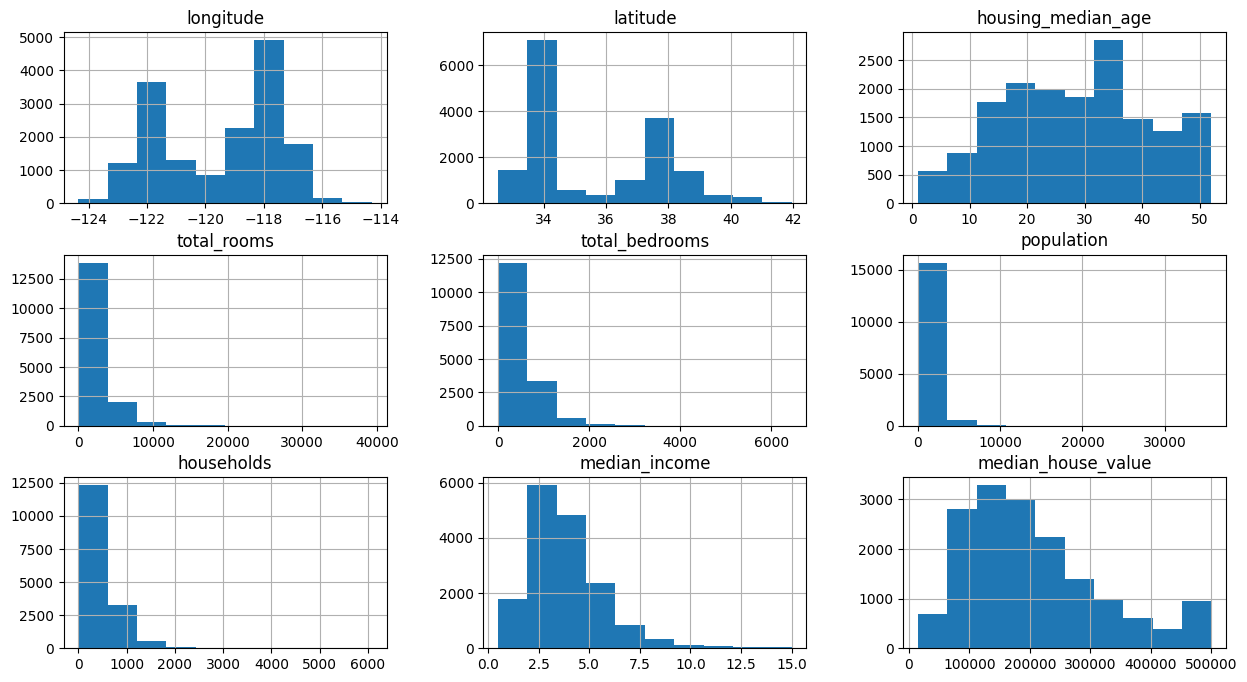

In [206]:
train_data.hist(figsize = (15,8))

<Axes: >

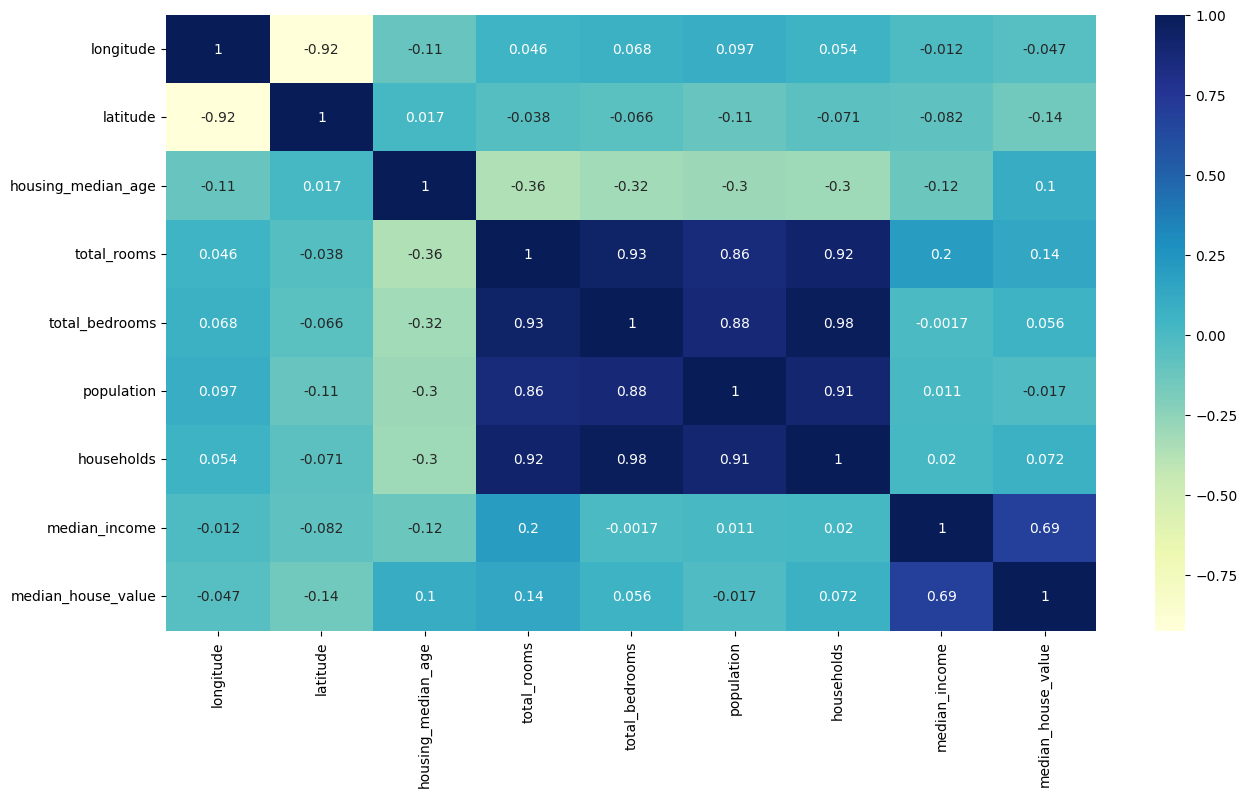

In [207]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(numeric_only = True), annot=True, cmap='YlGnBu')

In [208]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

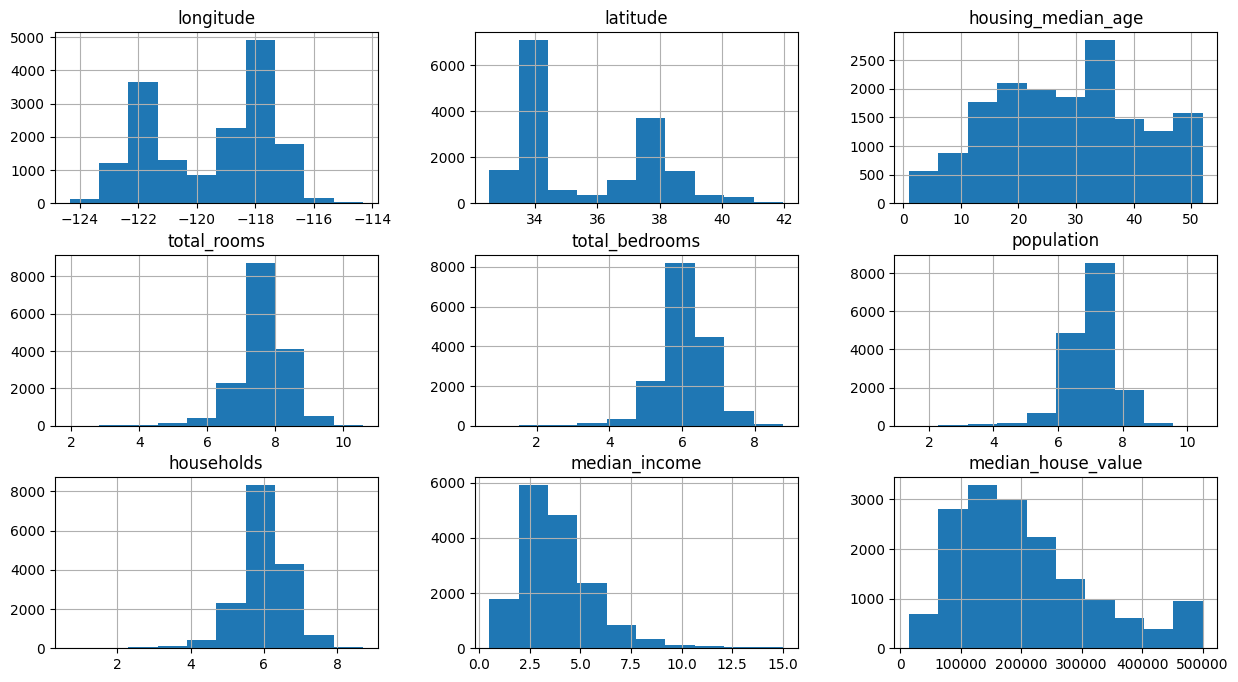

In [209]:
train_data.hist(figsize = (15,8))

In [210]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity, dtype = int)).drop(['ocean_proximity'], axis=1)

<Axes: >

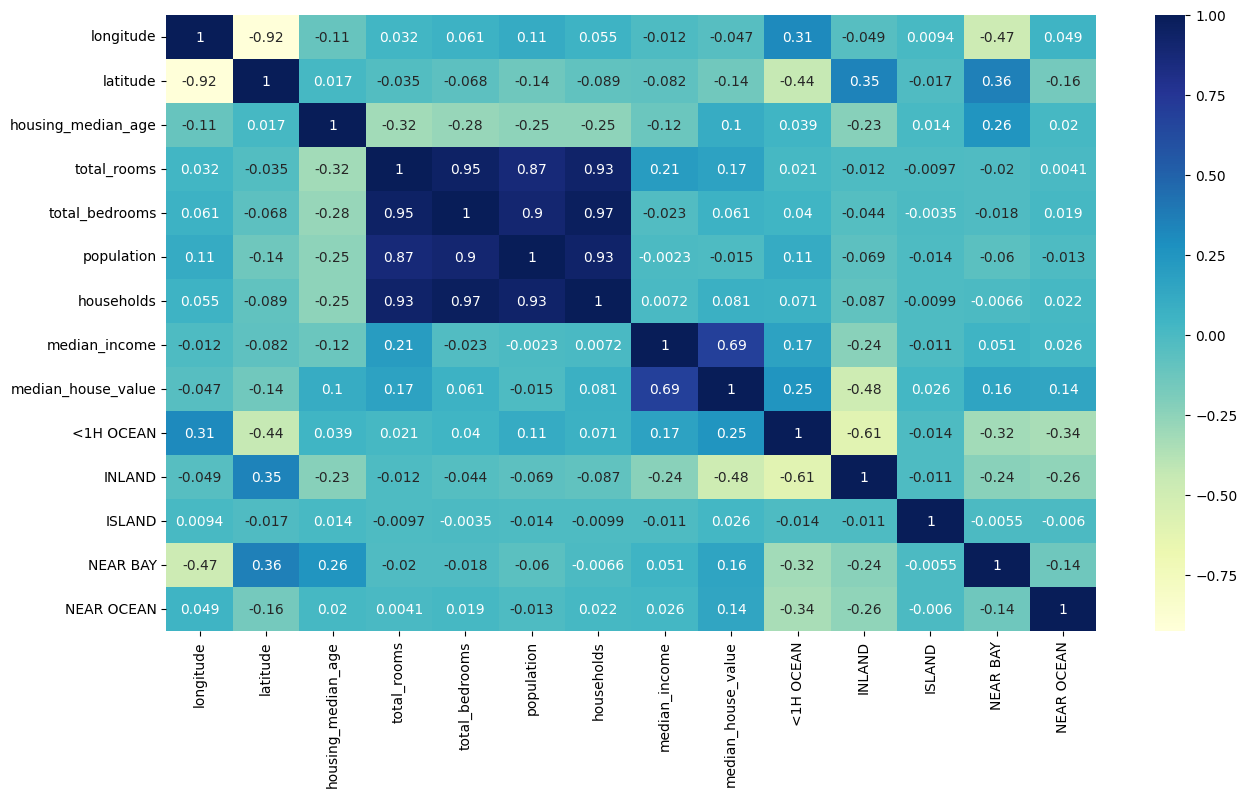

In [211]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

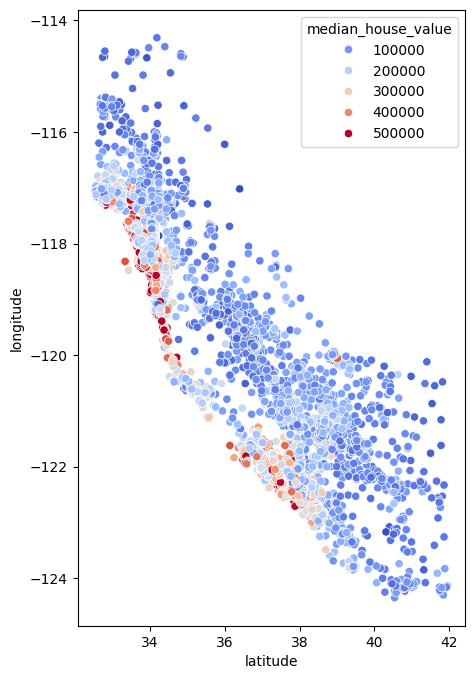

In [212]:
plt.figure(figsize = (5,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

In [213]:
from operator import truediv

In [214]:
train_data['bedroomratio'] = truediv(train_data['total_bedrooms'], train_data['total_rooms'])
train_data['roomsratio'] = train_data['total_rooms'] / train_data['households']

<Axes: >

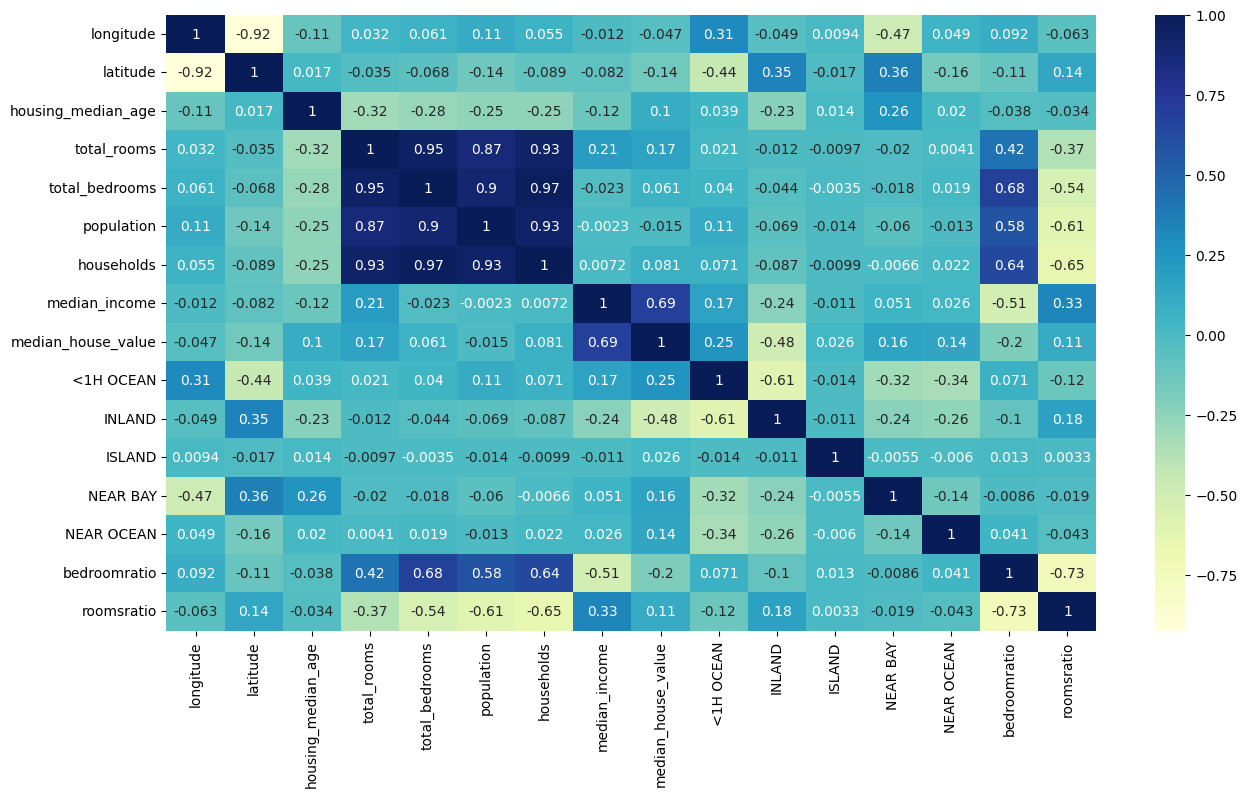

In [227]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [228]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value'] 
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression()

In [229]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity, dtype = int)).drop(['ocean_proximity'], axis=1)

test_data['bedroomratio'] = truediv(test_data['total_bedrooms'], test_data['total_rooms'])
test_data['roomsratio'] = test_data['total_rooms'] / test_data['households']

X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value'] 

AttributeError: 'DataFrame' object has no attribute 'ocean_proximity'

In [230]:
X_test_s = scaler.transform(X_test)

In [231]:
reg.score(X_test_s, y_test)

0.6877740023967398

In [232]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)


RandomForestRegressor()

In [233]:
y_test

14834     88900.0
18606    180300.0
14022    199100.0
10117    184400.0
16923    285400.0
           ...   
8278     179700.0
1307     145900.0
14370    500001.0
12045    123800.0
19864    231300.0
Name: median_house_value, Length: 4087, dtype: float64

In [234]:
forest.score(X_test_s, y_test)

0.8341612152495642

In [182]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [None, 4, 8],
    'min_samples_split': [2,4]}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score = True)

grid_search.fit(X_train_s, y_train)

KeyboardInterrupt: 

In [ ]:
best_forest = grid_search.best_estimator_

In [ ]:
best_forest.score(X_test_s, y_test)

In [223]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train_s, y_train)

KNeighborsRegressor(n_neighbors=2)

In [224]:
neigh.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 2,
 'p': 2,
 'weights': 'uniform'}

In [187]:
neigh.kneighbors_graph()

<16346x16346 sparse matrix of type '<class 'numpy.float64'>'
	with 32692 stored elements in Compressed Sparse Row format>

In [226]:
neigh.score(X_test_s, y_test)

0.7116732142946294